<a href="https://colab.research.google.com/github/herreraskarina/Exercises/blob/main/Classification_Machine_Learning_Titanic_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Machine Learning - Titanic Challenge

### Activity 1: The challenge is to predict whether a specific passenger was likely to have survived or not, `1` is for survived and `0` is for did not survive. Load the database `dataset/titanic_test.csv` and `dataset/titanic_train.csv`. Use the train database (`dataset/titanic_train.csv`) to visualize the data with plots. Explanation for each column can be found [here](https://www.kaggle.com/c/titanic/data).

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# creating train dataset
df_train = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking train dataset's basic information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Activity 2: Check the values using .describe()

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Activity 3: Check for null data

In [6]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Activity 4: Visualize how many people survived using count

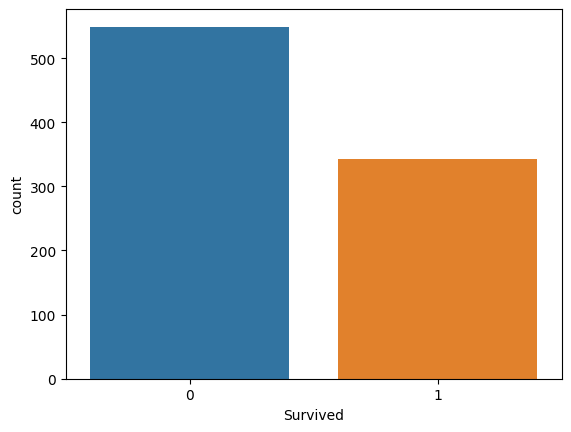

<Figure size 800x600 with 0 Axes>

In [7]:
sns.countplot(data=df_train, x='Survived');
plt.figure(figsize=(8,6));

### Activity 4: Visualize how many people were in the ship by gender

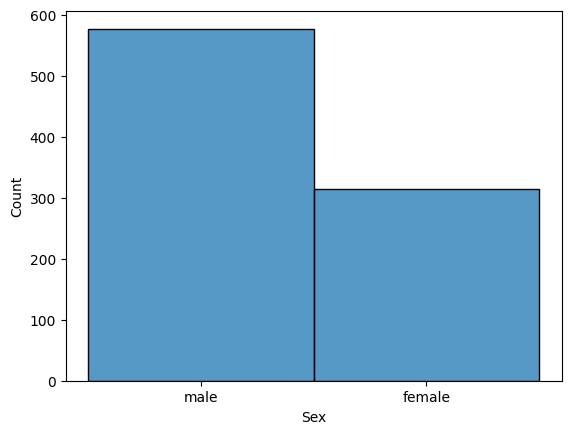

<Figure size 800x600 with 0 Axes>

In [8]:
sns.histplot(data=df_train, x='Sex');
plt.figure(figsize=(8,6));

### Activity 6: Visualize how many people survided by gender

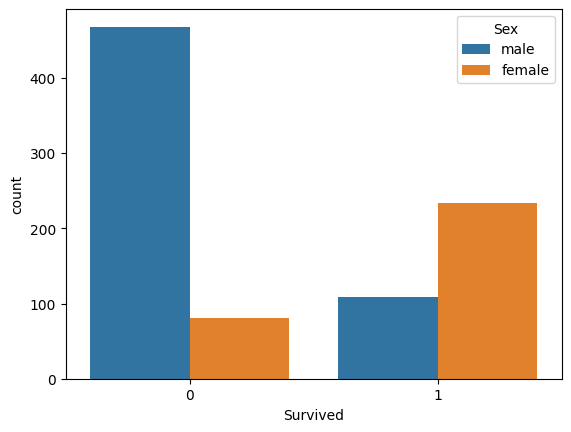

<Figure size 800x600 with 0 Axes>

In [9]:
sns.countplot(data=df_train, x='Survived', hue='Sex');
plt.figure(figsize=(8,6));

### Activity 7: Visualize how many people survided by class

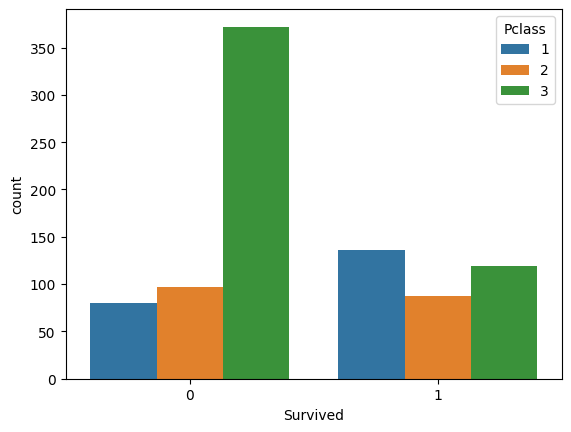

<Figure size 800x600 with 0 Axes>

In [10]:
sns.countplot(data=df_train, x='Survived', hue='Pclass');
plt.figure(figsize=(8,6));

### Activity 8: Visualize how many people survived according to age and gender, using a boxplot.

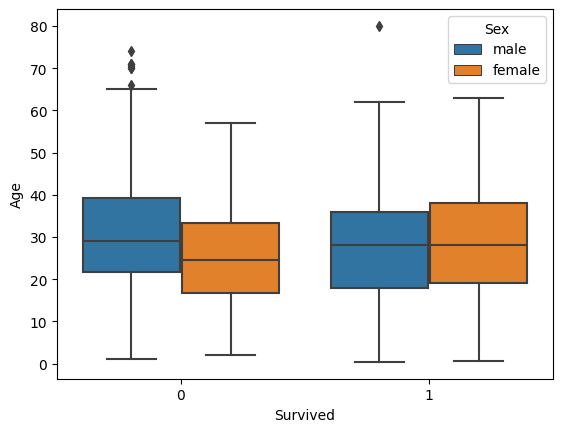

<Figure size 800x600 with 0 Axes>

In [11]:
sns.boxplot(data=df_train, x='Survived', y= 'Age', hue='Sex');
plt.figure(figsize=(8,6));

### Activity 9: Visualize how many people survived according to class and fare, using a boxplot.

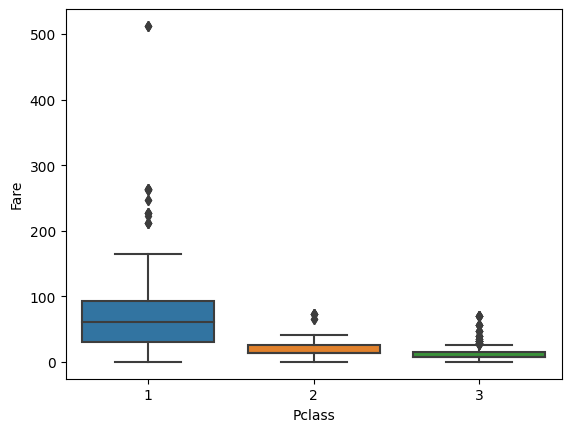

<Figure size 800x600 with 0 Axes>

In [12]:
sns.boxplot(data=df_train, x='Pclass', y= 'Fare');
plt.figure(figsize=(8,6));

**Comment**: It is noted that the majority of survivors were first-class people and women.

### Activity 10: One-Hot Encode categorical variables

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

train_X_encoded = pd.DataFrame(encoder.fit_transform(df_train[['Sex', 'Pclass', 'Embarked']]))
train_X_encoded.columns = encoder.get_feature_names_out(['Sex', 'Pclass', 'Embarked'])
df_train.drop(['Sex', 'Pclass', 'Embarked'] ,axis=1, inplace=True)
df_train = pd.concat([df_train, train_X_encoded ], axis=1)

df_train #novo dataframe após rodarmos o OneHotEncoder. Você consegue ver o que mudou?

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Activity 11: Normalize data

In [14]:
from sklearn.preprocessing import StandardScaler

features = ['Age', 'SibSp', 'Fare']

ss = StandardScaler()

ss.fit(df_train[features])

df_train[features] = ss.transform(df_train[features])

df_train

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,"Braund, Mr. Owen Harris",-0.530377,0.432793,0,A/5 21171,-0.502445,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.571831,0.432793,0,PC 17599,0.786845,C85,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",-0.254825,-0.474545,0,STON/O2. 3101282,-0.488854,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.365167,0.432793,0,113803,0.420730,C123,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0,"Allen, Mr. William Henry",0.365167,-0.474545,0,373450,-0.486337,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",-0.185937,-0.474545,0,211536,-0.386671,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
887,888,1,"Graham, Miss. Margaret Edith",-0.737041,-0.474545,0,112053,-0.044381,B42,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,0.432793,2,W./C. 6607,-0.176263,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,890,1,"Behr, Mr. Karl Howell",-0.254825,-0.474545,0,111369,-0.044381,C148,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Eliminando valores nulos

Agora antes de irmos adiante existe uma coisa sobre regressão logística e valores numéricos que precisamos saber: _Regressões odeiam valores nulos!_ (você consegue entender o porque disso?)

Analise as três colunas geradas e verifique se temos valores nulos nelas

Substitua esses valores nulos pela mediana, essa é uma tecnica comum para evitar problemas de valores nulos.

Uso métodos do pandas para isso. Essa aqui eu deixo com vocês escrever o código para fazer isso.

### Activity 12: Fill in the null values in the `Age` column with the average age of the passengers

In [15]:
df_train['Age'].mean()

2.388378943731429e-16

In [16]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

In [17]:
df_train.isna().sum()

PassengerId       0
Survived          0
Name              0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Sex_female        0
Sex_male          0
Pclass_1          0
Pclass_2          0
Pclass_3          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Embarked_nan      0
dtype: int64

### Activity 13: Perform the same changes in the test dataset (`OneHotEnconding` e `StandardScalar`).

In [18]:
df_test = pd.read_csv('/content/drive/MyDrive/titanic_test.csv')


df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

features = ['Age', 'SibSp', 'Fare']
df_test[features] = ss.transform(df_test[features])

encoder = OneHotEncoder(sparse_output=False)

test_X_encoded = pd.DataFrame(encoder.fit_transform(df_test[['Sex', 'Pclass', 'Embarked']]))
test_X_encoded.columns = encoder.get_feature_names_out(['Sex', 'Pclass', 'Embarked'])
df_test.drop(['Sex', 'Pclass', 'Embarked'] ,axis=1, inplace=True)
df_test = pd.concat([df_test, test_X_encoded ], axis=1)

In [19]:
# selecting the features that we will use in the model
features = ['Age', 'SibSp', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3']
# uploading them to X
df_train_X = df_train[features]
# creating y
df_train_y = df_train['Survived']

### Activity 14: Run the logistic regression model (import, initialize and then train it)

For the purposes of the exercise the `accuracy_score` will be used to check how good the models are.

In [20]:
# creating modelo
from sklearn.linear_model import LogisticRegression
modeloLR = LogisticRegression()
# fitting the model to the train data
modeloLR.fit(df_train_X, df_train_y)

LogisticRegression()

### Activity 15: Check the performance of the model with the test data

In [21]:
# selecting the features
features = ['Age', 'SibSp', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3']
df_test['Embarked_nan'] = 0
# loading the independent variables
df_test_X = df_test[features]
# loading the dependent variable
df_test_y = pd.read_csv('/content/drive/MyDrive/gender_submission.csv')[['Survived']]

In [22]:
# checking predictions
y_predRL = modeloLR.predict(df_test_X)

### Activity 16: Check the accuracy of the model

In [24]:
from sklearn import metrics
# comparing the value that the model predicted (y_predRL) with the value that it should have predicted (test_df_y)
print("Accuracy of the Logistic Regression model: {}".format(metrics.accuracy_score(df_test_y, y_predRL).round(8)))

Accuracy of the Logistic Regression model: 0.95215311


### Activity 17: Use a decision tree to create a new model (DT model), using the maximum depth of 3 as a parameter to the tree (max_depth=3)

In [26]:
# creating model
from sklearn.tree import DecisionTreeClassifier
modeloDT = DecisionTreeClassifier(max_depth=3)
# fitting model to train data
modeloDT.fit(df_train_X, df_train_y)

DecisionTreeClassifier(max_depth=3)

In [27]:
y_predDT = modeloDT.predict(df_test_X)

In [28]:
print("Accuracy of the Decision Tree model: {}".format(metrics.accuracy_score(df_test_y, y_predDT).round(8)))

Accuracy of the Decision Tree model: 0.96650718


### Activity 18: Visualize Decision Tree

In [29]:
#visualizing the columns used in the test
df_test_X.columns

Index(['Age', 'SibSp', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

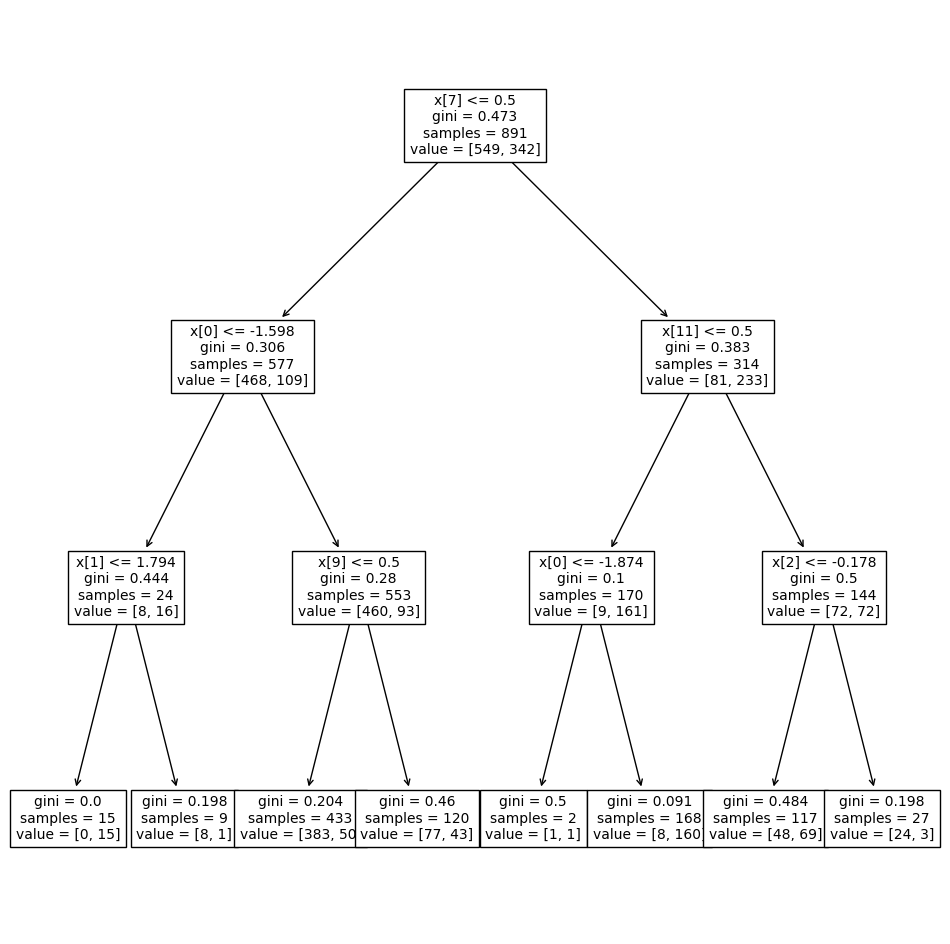

In [30]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(modeloDT, fontsize=10)
plt.show()

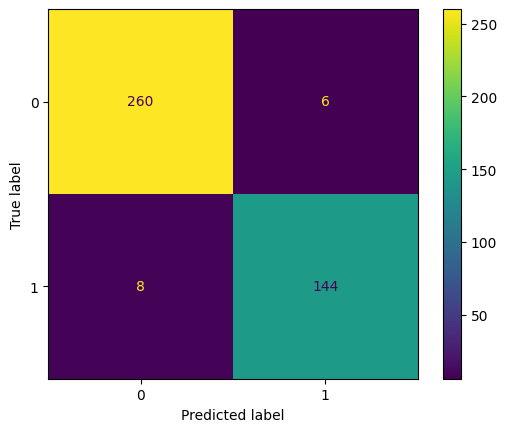

In [34]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmDT = confusion_matrix(df_test_y, y_predDT)
dispSVC = ConfusionMatrixDisplay(confusion_matrix=cmDT)
dispSVC.plot();

### Activity 19: #Use Support Vector Machine (SVC - modeloSVC) to predict the values. Change the model's hyperparameters `Kernel` and `C` and check for improvement in the results.


In [35]:
# creating model
from sklearn.svm import SVC
modeloSVC = SVC()
# fitting model to train data
modeloSVC.fit(df_train_X, df_train_y)

SVC()

In [36]:
# verify accuracy
y_predSVC = modeloSVC.predict(df_test_X)
print("Accuracy of the SVC model: {}".format(metrics.accuracy_score(df_test_y, y_predSVC).round(8)))

Accuracy of the SVC model: 0.90909091


In [37]:
# using different hyperparameters
modeloSVC2 = SVC(kernel='linear')
modeloSVC2.fit(df_train_X, df_train_y)
y_predSVC2 = modeloSVC2.predict(df_test_X)
print("Accuracy of the SVC model with different kernel: {}".format(metrics.accuracy_score(df_test_y, y_predSVC2).round(8)))

Accuracy of the SVC model with different kernel: 1.0


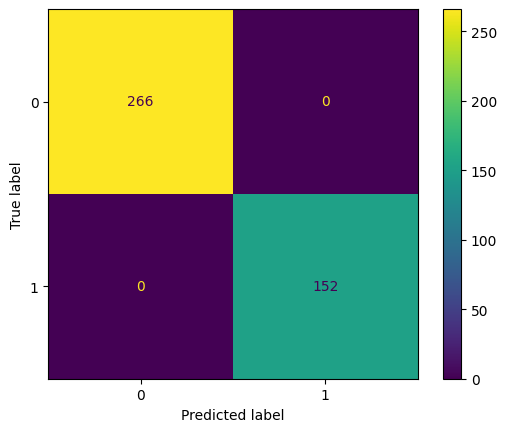

In [38]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmSVC = confusion_matrix(df_test_y, y_predSVC2)
dispSVC = ConfusionMatrixDisplay(confusion_matrix=cmSVC)
dispSVC.plot();

In [39]:
from sklearn.metrics import classification_report
print(classification_report(df_test_y, y_predSVC2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



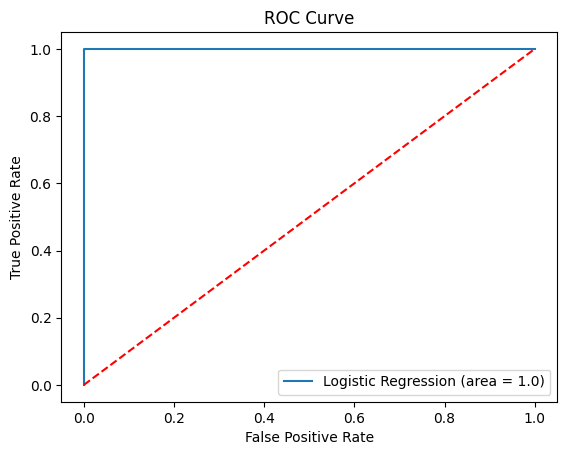

In [40]:
# importing functions
from sklearn.metrics import roc_curve, roc_auc_score
# generating the graph of the ROC curve
logit_roc_auc = roc_auc_score(df_test_y, modeloSVC2.predict(df_test_X))
fpr, tpr, thresholds = roc_curve(df_test_y, modeloSVC2.predict(df_test_X))
# customizing chart
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right");

By changing the kernel of the SVC model to linear, it achieves an accuracy of 100%. The confusion matrix also shows that he didn't get anything wrong.

### Activity 20: Use Naive Bayes (modeloNB) to try and get better results.

In [41]:
# creating model
from sklearn.naive_bayes import GaussianNB
modeloNB = GaussianNB()
# fitting model to train data
modeloNB.fit(df_train_X, df_train_y)
# checking accuracy
y_predNB = modeloNB.predict(df_test_X)
print("Accuracy of Naive Bayes model: {}".format(metrics.accuracy_score(df_test_y, y_predNB).round(8)))

Accuracy of Naive Bayes model: 0.71052632


### Activity 21: Use KNN (modeloSVC). Change hyperparameter n_neighbors to 2 and 10.

In [42]:
# creating model
from sklearn.neighbors import KNeighborsClassifier
modeloKNN = KNeighborsClassifier(n_neighbors=5) # considering 5 neighbors
# fitting model to train data
modeloKNN.fit(df_train_X, df_train_y)
# checking accuracy
y_predKNN = modeloKNN.predict(df_test_X)
print("Accuracy of KNN model: {}".format(metrics.accuracy_score(df_test_y, y_predKNN).round(8)))

Accuracy of KNN model: 0.81578947


In [43]:
# using n_neighbors 2
modeloKNN2 = KNeighborsClassifier(n_neighbors=2)
# fitting model to train data
modeloKNN2.fit(df_train_X, df_train_y)
# checking accuracy
y_predKNN2 = modeloKNN2.predict(df_test_X)
print("Accuracy of KNN2 model: {}".format(metrics.accuracy_score(df_test_y, y_predKNN2).round(8)))

Accuracy of KNN2 model: 0.83014354


In [44]:
# using n_neighbors 10
modeloKNN10 = KNeighborsClassifier(n_neighbors=2)
# fitting model to train data
modeloKNN10.fit(df_train_X, df_train_y)
# checking accuracy
y_predKNN10 = modeloKNN10.predict(df_test_X)
print("Accuracy of KNN10 model: {}".format(metrics.accuracy_score(df_test_y, y_predKNN10).round(8)))

Accuracy of KNN10 model: 0.83014354


### Activity 22: Use SGD.

In [45]:
# creating model
from sklearn.linear_model import SGDClassifier
modeloSGD = SGDClassifier(loss='hinge', max_iter=1000)
# fitting model to train data
modeloSGD.fit(df_train_X, df_train_y)
# checking accuracy
y_predSGD = modeloSGD.predict(df_test_X)
print("Accuracy of SGD model: {}".format(metrics.accuracy_score(df_test_y, y_predSGD).round(8)))

Accuracy of SGD model: 0.92583732


### Activity 22: Use RandomForest. Change the n_estimators and min_samples_leaf to check if the results change.

In [46]:
# creating model
from sklearn.ensemble import RandomForestClassifier
modeloRF = RandomForestClassifier(n_estimators=100, min_samples_leaf=2)
# fitting model to train data
modeloRF.fit(df_train_X, df_train_y)
# checking accuracy
y_predRF = modeloRF.predict(df_test_X)
print("Accuracy of Random Forest model: {}".format(metrics.accuracy_score(df_test_y, y_predRF).round(8)))

Accuracy of Random Forest model: 0.8708134


In [47]:
# changing hyperparameters
modeloRF2 = RandomForestClassifier(n_estimators=1000, min_samples_leaf=4)
modeloRF2.fit(df_train_X, df_train_y)
y_predRF2 = modeloRF2.predict(df_test_X)
print("Accuracy of Random Forest2 model: {}".format(metrics.accuracy_score(df_test_y, y_predRF2).round(8)))

Accuracy of Random Forest2 model: 0.89473684


### Activity 23: Which model has the best accuracy?

In [48]:
print("Accuracy Logistic Regression: {}".format(metrics.accuracy_score(df_test_y, y_predRL).round(8)))
print("Accuracy Decision Tree: {}".format(metrics.accuracy_score(df_test_y, y_predDT).round(8)))
print("Accuracy SVC: {}".format(metrics.accuracy_score(df_test_y, y_predSVC).round(8)))
print("Accuracy SVC2: {}".format(metrics.accuracy_score(df_test_y, y_predSVC2).round(8)))
print("Accuracy Naive Bayes: {}".format(metrics.accuracy_score(df_test_y, y_predNB).round(8)))
print("Accuracy KNN: {}".format(metrics.accuracy_score(df_test_y, y_predKNN).round(8)))
print("Accuracy KNN2: {}".format(metrics.accuracy_score(df_test_y, y_predKNN2).round(8)))
print("Accuracy SGD: {}".format(metrics.accuracy_score(df_test_y, y_predSGD).round(8)))
print("Accuracy Random Forest: {}".format(metrics.accuracy_score(df_test_y, y_predRF).round(8)))
print("Accuracy Random Forest2: {}".format(metrics.accuracy_score(df_test_y, y_predRF2).round(8)))

Accuracy Logistic Regression: 0.95215311
Accuracy Decision Tree: 0.96650718
Accuracy SVC: 0.90909091
Accuracy SVC2: 1.0
Accuracy Naive Bayes: 0.71052632
Accuracy KNN: 0.81578947
Accuracy KNN2: 0.83014354
Accuracy SGD: 0.92583732
Accuracy Random Forest: 0.8708134
Accuracy Random Forest2: 0.89473684


The SVC model with kernel='linear' hyperparameter is the best model.